In [21]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
PROJECT_ROOT = Path().resolve().parents[0]   # or parents[1] if notebook lives deeper
DATA_DIR = PROJECT_ROOT / "data"
RAW_DIR = DATA_DIR / "raw"


In [12]:
data = pd.read_csv(RAW_DIR / "criteo-uplift-v2.1.csv")

In [18]:
# Examine outcome variable distribution
{
    "conversion": data['conversion'].value_counts(normalize=True),
    "exposure": data['exposure'].value_counts(normalize=True),
    "visit": data['visit'].value_counts(normalize=True)
}


{'conversion': conversion
 0    0.997083
 1    0.002917
 Name: proportion, dtype: float64,
 'exposure': exposure
 0    0.969369
 1    0.030631
 Name: proportion, dtype: float64,
 'visit': visit
 0    0.953008
 1    0.046992
 Name: proportion, dtype: float64}

In [20]:
data.groupby("treatment")["conversion"].mean()


treatment
0    0.001938
1    0.003089
Name: conversion, dtype: float64

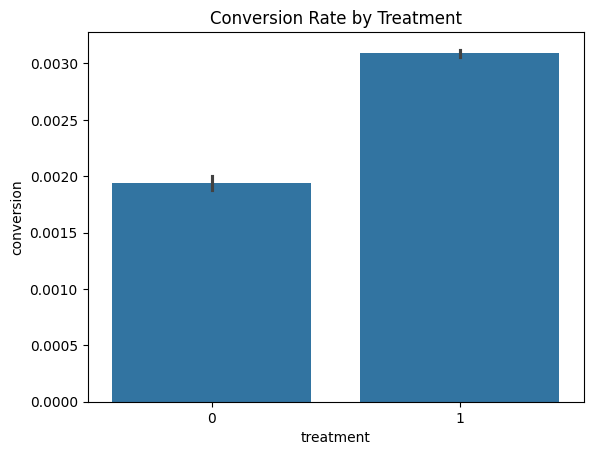

In [23]:
# Visualize outcomes  by treatment group

sns.barplot(x = 'treatment', y = 'conversion', data = data)
plt.title("Conversion Rate by Treatment")
plt.show()

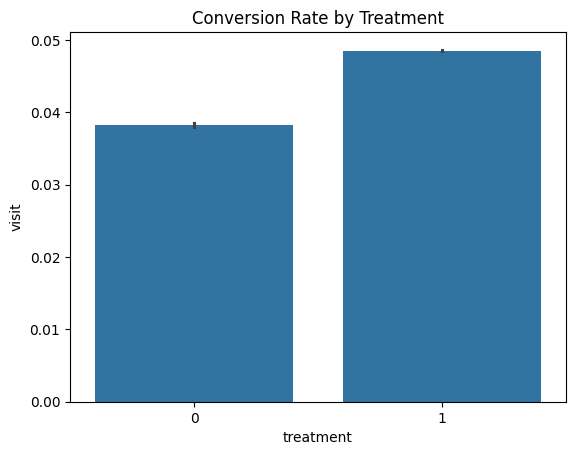

In [24]:

sns.barplot(x = 'treatment', y = 'visit', data = data)
plt.title("Visit Rate by Treatment")
plt.show()

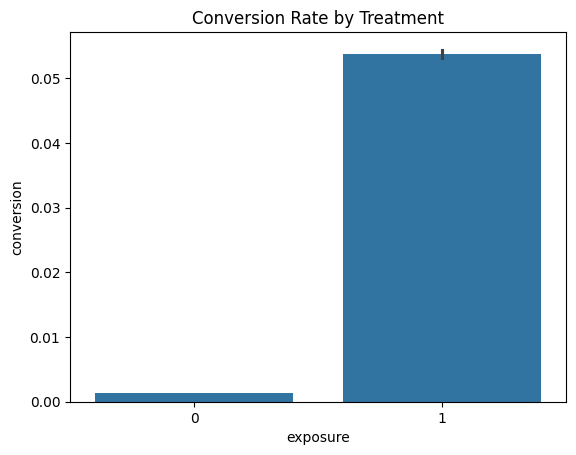

In [25]:

sns.barplot(x = 'exposure', y = 'conversion', data = data)
plt.title("Conversion Rate by Exposure")
plt.show()

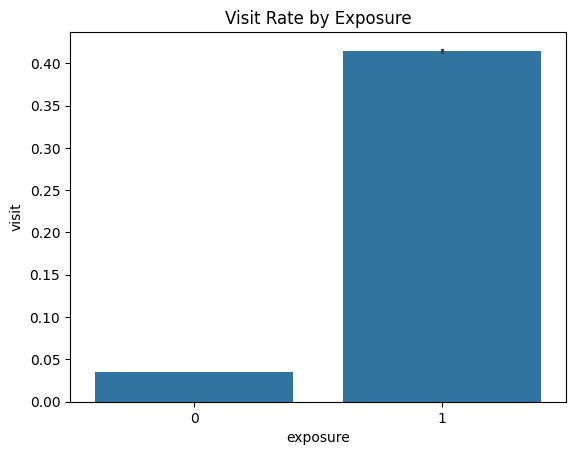

In [26]:

sns.barplot(x = 'exposure', y = 'visit', data = data)
plt.title("Visit Rate by Exposure")
plt.show()

Seems like there is no actual treatment effect (treatment = seeing the ads). ITT seems positive though. 

In [28]:
data["f0_bin"] = pd.qcut(data["f0"], 10, duplicates='drop')

data.groupby("f0_bin")["conversion"].mean()



/var/folders/sx/jgx0y67n0v557w_2c0f5xj800000gn/T/ipykernel_77977/3502569442.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby("f0_bin")["conversion"].mean()


f0_bin
(12.615, 13.927]    0.004215
(13.927, 18.127]    0.009613
(18.127, 21.923]    0.003893
(21.923, 22.771]    0.000638
(22.771, 24.009]    0.001016
(24.009, 24.833]    0.000488
(24.833, 25.991]    0.000574
(25.991, 26.745]    0.000300
Name: conversion, dtype: float64